In [ ]:
import math 
import numpy as np
import random
import matplotlib.pyplot as plt

Using an exponential form of the leaky integrate fire model which was modelled previously. Consider the differential equation $$ \tau_L\frac{dV}{dt} = E_L - V + \Delta_T  exp(\frac{(V-V_T)}{\Delta_T})+ \frac{I}{g_L} + \sigma_v\sqrt{2\tau_l}\xi(t)$$

with an additional variability term given by our random process 
$$ \sigma_v\sqrt{2\tau_l}\xi(t)$$
 COnsider also the refractory state of the neuron such that if the voltage exceeds a value $V_{th}$ which results in a spike, the neuron refactors and the voltage is set to a refactory value $V_{re}$.

Due to the phase plane of the firing rate function $$ F(V) = \tau\frac{dV}{dt} $$ wherevy $\dot{v}$ diverges towards infitiy after any arbitrary v greater than $V_t$ we consider an arbitray threshold Vth sufficiently larger than $V_t$.

In [ ]:
sim_time = 1000 # 1s runtime
dt = 0.1 # increment step
time = np.arange(0, sim_time, dt) # enumeration of t
tau = 20 # closing time constant 
mu = 5 # mean voltage
sig = 2 # sigma
Vth = 20 # arbitray threshold value > V_t
Vre = 0 # arbitray reset value < V_t
V_t = 6 # membrane potential
V = np.zeros(int(sim_time/dt)) # enumeration of voltage
V[0] = 0
delta_t = 3 # spie initiation voltage threshold value



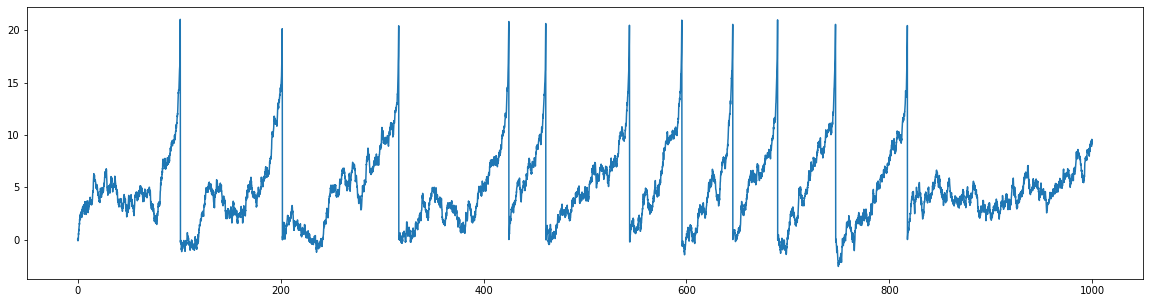

In [ ]:
for i in range(int(sim_time/dt) - 1):
  if (V[i] < Vth):
    V[i+1] = V[i] + (dt/tau)*(mu-V[i]) + (dt/tau)*delta_t*np.exp((V[i] - V_t)/delta_t) + np.sqrt(2*dt/tau)*sig*np.random.normal(0, 1)
  else:
    V[i+1] = Vre

figure = plt.figure(figsize= (20,5))
plt.plot(time, V)

Attempting to approimate the firing rate of the neuron by using the relation $$ \int_{V_{re}}^{V_{th}} \frac{dV}{F(V)} = \frac{T}{\tau} $$ where we can compute the rate as $ r = 1/T $ and where $$ F(V) = \tau\frac{dV}{dt}$$

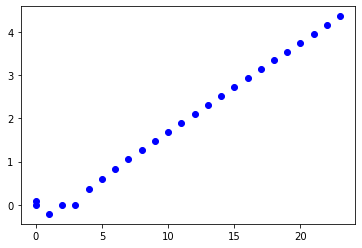

In [ ]:
def func(e,v):
  return e - v + delta_t*np.exp((v-V_t)/delta_t) 
def calc_rate(e):
  sum = 0
  for i in range(int(sim_time/dt) - 3):
    sum += 1/(2*func(e, V[i+1]))
  sum += 1/func(e, V[0])
  sum += 1/func(e, V[-1])
  sum /= 1000
  return 1/(tau*dt*sum/2)

n = 25
means = np.zeros(n)
rates = np.zeros(n)
for i in range(0, n-1):
  means[i] = i
  rates[i] = calc_rate(i)
rates[2] = 0
plt.figure
plt.scatter(means, rates, marker =r'o', color = 'b', label='Data')
plt.show()